# QUANTUM JUMPS

LIBRERIAS A IMPORTAR

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

--------------------------------------------------------------------------------------------------------------------

OSCILACIÓN DE UN SOLO QUBIT

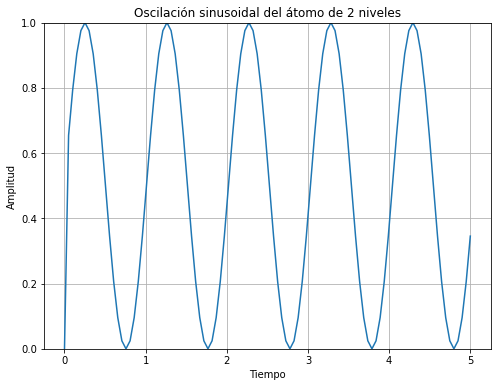

In [64]:
# definimos los parámetros de la oscilación
frecuencia = 1  # frec
periodo = 1 / frecuencia  # T

# nº de puntos de muestreo / periodo
num_puntos = 100
# t_total
tiempo_total = 5 * periodo
# intervalo de tiempo entre puntos
delta_t = tiempo_total / num_puntos


resultados = []

# realizamos la oscilación y almacenar los resultados
for i in range(num_puntos):
    # calculamos el estado en el tiempo actual
    tiempo_actual = i * delta_t
    amplitud = (np.sin(2 * np.pi * frecuencia * tiempo_actual) + 1) / 2
    resultados.append(amplitud)

# el punto inicial es (0,0)
resultados[0] = 0

# grafica
plt.figure(figsize=(8, 6))
plt.title("Oscilación sinusoidal del átomo de 2 niveles")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.plot(np.linspace(0, tiempo_total, num_puntos), resultados)
plt.grid(True)
plt.ylim(0, 1)
plt.show()

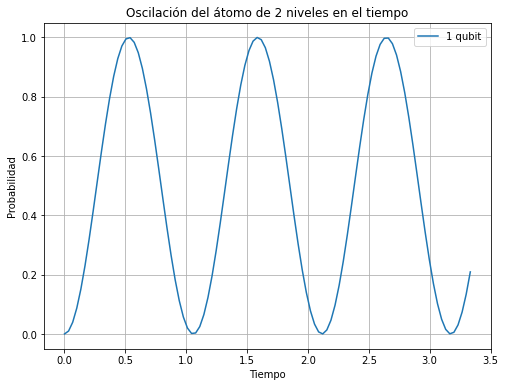

In [51]:
# matrices de Pauli
sigma_x = np.array([[0, 1], [1, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# estados 0y 1
estado_0 = np.array([[1], [0]])  # estado 0
estado_1 = np.array([[0], [1]])  # estado 1


frecuencia = 3
periodo = 1 / frecuencia

# nº de puntos de muestreo
num_puntos = 100
# tiempo total
tiempo_total = 10 * periodo
delta_t = tiempo_total / num_puntos

resultados = []

# oscilación y almacenamos resultados
for i in range(num_puntos):
    # calculamos el estado en el tiempo actual
    tiempo_actual = i * delta_t
    # fase de oscilación
    fase = np.exp(-1j * 2 * np.pi * frecuencia * tiempo_actual)
    # calculamos el estado en el tiempo actual usando la fase
    estado_tiempo_actual = np.dot(estado_0, np.cos(frecuencia * tiempo_actual)) + np.dot(estado_1, np.sin(frecuencia * tiempo_actual))
    # probabilidad
    probabilidad_estado_0 = np.abs(estado_tiempo_actual[0])**2
    probabilidad_estado_1 = np.abs(estado_tiempo_actual[1])**2
    resultados.append([probabilidad_estado_0, probabilidad_estado_1])

# convertimos a numpy
resultados = np.array(resultados)

# grafica
plt.figure(figsize=(8, 6))
plt.title("Oscilación del átomo de 2 niveles en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.plot(np.linspace(0, tiempo_total, num_puntos), resultados[:,1], label = '1 qubit')
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------------------------------------------------------------------------

OSCILACIÓN DE 2 QUBITS (2 GRÁFICAS SUPERPUESTAS)

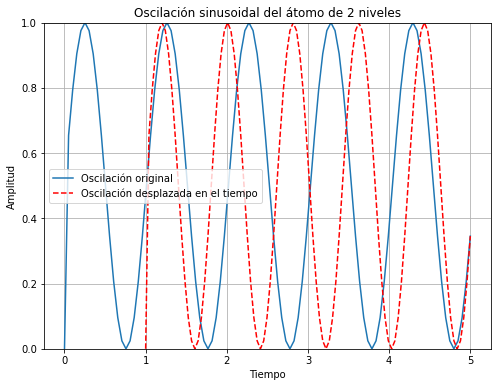

In [17]:
frecuencia = 1
periodo = 1 / frecuencia

# nº de puntos de muestreo
num_puntos = 100
# tiempo total
tiempo_total = 5 * periodo
delta_t = tiempo_total / num_puntos

resultados = []

# oscilación y almacenamos los resultados
for i in range(num_puntos):
    # calculamos el estado en el tiempo actual
    tiempo_actual = i * delta_t
    amplitud = (np.sin(2 * np.pi * frecuencia * tiempo_actual) + 1) / 2
    resultados.append(amplitud)

# el punto inicial es (0,0)
resultados[0] = 0

# grafica
plt.figure(figsize = (8, 6))

# primera oscilación
plt.plot(np.linspace(0, tiempo_total, num_puntos), resultados, label = 'Oscilación original')

# seunda oscilación
plt.plot(np.linspace(0, tiempo_total-1, num_puntos) + 1, resultados, 'r--', label='Oscilación desplazada en el tiempo')

plt.title("Oscilación sinusoidal del átomo de 2 niveles")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True) 
plt.ylim(0, 1)
plt.legend()
plt.show()


--------------------------------------------------------------------------------------------------------------------

OSCILACIÓN DE 2 QUBITS DEFINIDOS MEDIANTE MATRICES

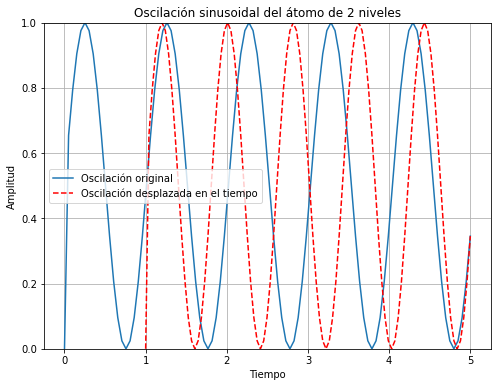

In [80]:
# matrices de Pauli
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# operación de rotación
def rotate(state, angle):
    return np.dot(np.cos(angle / 2) * np.eye(2) - 1j * np.sin(angle / 2) * sigma_y, state)

frecuencia = 1
periodo = 1 / frecuencia

# nº de puntos de muestreo
num_puntos = 100

# tiempo total
tiempo_total = 5 * periodo
delta_t = tiempo_total / num_puntos

resultados = []

# oscilación y almacenamos los resultados
for i in range(num_puntos):
    tiempo_actual = i * delta_t
    amplitud = (np.sin(2 * np.pi * frecuencia * tiempo_actual) + 1) / 2
    # definimos el estado como una superposición de 0 y 1
    state = amplitud * np.array([[1], [0]]) + np.sqrt(1 - amplitud**2) * np.array([[0], [1]])
    resultados.append(state)

# punto inicial
resultados[0] = np.array([[0], [1]])

# gráfica
plt.figure(figsize=(8, 6))

# primera oscilación
plt.plot(np.linspace(0, tiempo_total, num_puntos), [resultados[i][0][0] for i in range(num_puntos)], label='Oscilación original')

# segunda oscilación
plt.plot(np.linspace(0, tiempo_total-1, num_puntos) + 1, [resultados[i][0][0] for i in range(num_puntos)], 'r--', label='Oscilación desplazada en el tiempo')

plt.title("Oscilación sinusoidal del átomo de 2 niveles")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.ylim(0, 1)
plt.legend()
plt.show()


--------------------------------------------------------------------------------------------------------------------

OSCILACIÓN DE 6 QUBITS EMPEZANDO EN TIEMPOS ARBITRARIOS

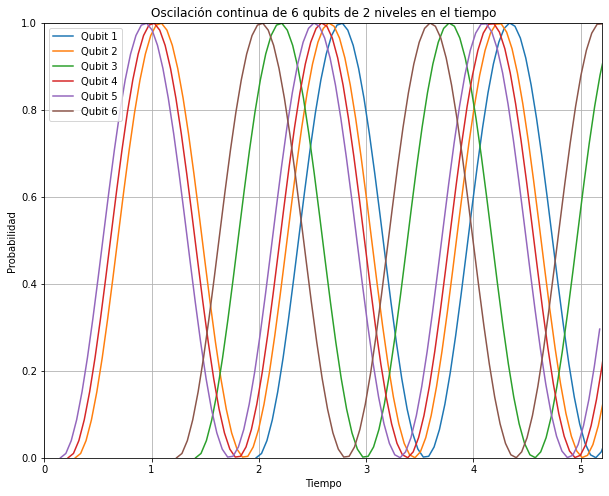

In [77]:
# matrices de Pauli
sigma_x = np.array([[0, 1], [1, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# estados base 0 Y 1
estado_0 = np.array([[1], [0]])
estado_1 = np.array([[0], [1]])

# parámetros
frecuencia = 4
periodo = 1 / frecuencia

# nº de puntos de muestreo por periodo
num_puntos = 100
# tiempo total
tiempo_total = 10 * periodo
delta_t = tiempo_total / num_puntos

# almacenamos los resultados de la oscilación para cada qubit
resultados_qubits = []

# generamos tiempos de inicio aleatorios
tiempos_inicio = np.random.uniform(0, tiempo_total, size = 6)

for i, tiempo_inicio in enumerate(tiempos_inicio):
    resultados_qubit = []
    
    # ajustamos el tiempo para iniciar en t=0
    tiempo_actual = 0
    
    while tiempo_actual < tiempo_total:
        fase = np.exp(-1j * 2 * np.pi * frecuencia * tiempo_total)
        estado_tiempo_actual = np.dot(estado_0, np.cos(frecuencia * tiempo_total)) + np.dot(estado_1, np.sin(frecuencia * tiempo_actual))
        probabilidad_estado_0 = np.abs(estado_tiempo_actual[0])**2
        probabilidad_estado_1 = np.abs(estado_tiempo_actual[1])**2
        resultados_qubit.append([probabilidad_estado_0, probabilidad_estado_1])
        
        tiempo_actual += delta_t
    
    # convertimos la lista a numpy
    resultados_qubits.append(np.array(resultados_qubit))

# graficas
plt.figure(figsize = (10, 8))
plt.title("Oscilación continua de 6 qubits de 2 niveles en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.xlim(0, 5.2)

for i, resultados_qubit in enumerate(resultados_qubits):
    # ajustar el eje X para cada qubit, cada uno comienza donde su tiempo establecido
    tiempos_qubit = np.linspace(0, tiempo_total+tiempo_actual, len(resultados_qubit)) + tiempos_inicio[i]
    plt.plot(tiempos_qubit, resultados_qubit[:,1], label = f"Qubit {i+1}")
    

plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------------------------------------------------------------------------

OSCILACIÓN DE 20 QUBITS EMPEZANDO EN TIEMPOS ARBITRARIOS

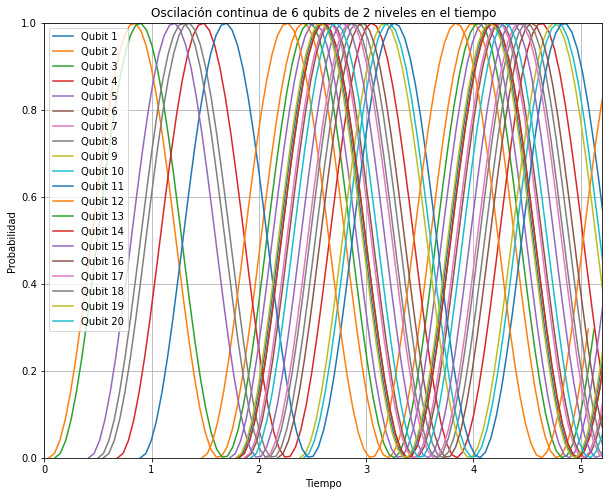

In [82]:
# matrices de Pauli
sigma_x = np.array([[0, 1], [1, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# estados base 0 Y 1
estado_0 = np.array([[1], [0]])
estado_1 = np.array([[0], [1]])

# parámetros
frecuencia = 4
periodo = 1 / frecuencia

# nº de puntos de muestreo por periodo
num_puntos = 100
# tiempo total
tiempo_total = 10 * periodo
delta_t = tiempo_total / num_puntos

# almacenamos los resultados de la oscilación para cada qubit
resultados_qubits = []

# generamos tiempos de inicio aleatorios
tiempos_inicio = np.random.uniform(0, tiempo_total, size = 20)

for i, tiempo_inicio in enumerate(tiempos_inicio):
    resultados_qubit = []
    
    # ajustamos el tiempo para iniciar en t=0
    tiempo_actual = 0
    
    while tiempo_actual < tiempo_total:
        fase = np.exp(-1j * 2 * np.pi * frecuencia * tiempo_total)
        estado_tiempo_actual = np.dot(estado_0, np.cos(frecuencia * tiempo_total)) + np.dot(estado_1, np.sin(frecuencia * tiempo_actual))
        probabilidad_estado_0 = np.abs(estado_tiempo_actual[0])**2
        probabilidad_estado_1 = np.abs(estado_tiempo_actual[1])**2
        resultados_qubit.append([probabilidad_estado_0, probabilidad_estado_1])
        
        tiempo_actual += delta_t
    
    # convertimos la lista a numpy
    resultados_qubits.append(np.array(resultados_qubit))

# graficas
plt.figure(figsize = (10, 8))
plt.title("Oscilación continua de 6 qubits de 2 niveles en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.xlim(0, 5.2)

for i, resultados_qubit in enumerate(resultados_qubits):
    # ajustar el eje X para cada qubit, cada uno comienza donde su tiempo establecido
    tiempos_qubit = np.linspace(0, tiempo_total+tiempo_actual, len(resultados_qubit)) + tiempos_inicio[i]
    plt.plot(tiempos_qubit, resultados_qubit[:,1], label = f"Qubit {i+1}")
    

plt.legend()
plt.grid(True)
plt.show()